In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('zad5_Stroke.csv', sep=';', decimal=',')
display(df)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,NaN,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0.0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
395,Female,58.0,0,0.0,Yes,NaN,Rural,69.12,28.3,Unknown,0
396,Female,79.0,0,0.0,No,Private,Urban,253.86,28.8,formerly smoked,0
397,Female,46.0,0,0.0,Yes,Govt_job,Urban,NaN,27.8,never smoked,0
398,Male,13.0,0,0.0,No,children,Urban,NaN,24.3,Unknown,0


In [6]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease        float64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
df['heart_disease'].fillna(df['heart_disease'].interpolate(), inplace=True)
df['avg_glucose_level'].fillna(df['avg_glucose_level'].interpolate(), inplace=True)
df['bmi'].fillna(df['bmi'].interpolate(), inplace=True)

In [8]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_columns = [col for col in df.columns if col not in categorical_columns + ['stroke']]
x_numeric = df[numerical_columns]
x_categorical = df[categorical_columns]

encoder = LabelEncoder()
x_categorical_encoded = x_categorical.apply(encoder.fit_transform)

x = pd.concat([x_numeric, x_categorical_encoded], axis=1)
df.drop(['stroke'], axis=1)
y = df['stroke']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Średnia dokładność treningowa: 0.506, Hiperparametry: {'C': 0.001, 'degree': 2}
Dokładnośc dla zbioru treningowego: 0.503
Dokładność dla zbioru testowego: accuracy=0.487


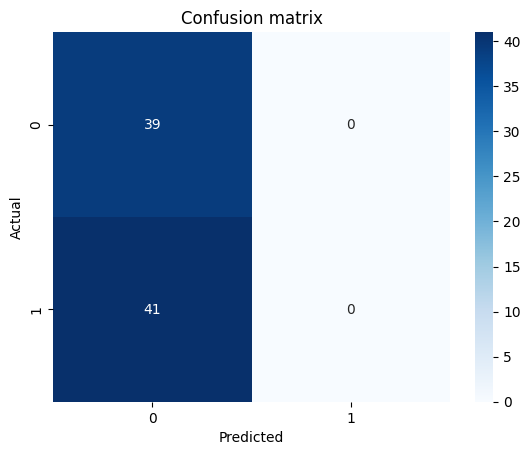

Średnia dokładność treningowa: 0.503, Hiperparametry: {'C': 0.001, 'degree': 4}
Dokładnośc dla zbioru treningowego: 0.503
Dokładność dla zbioru testowego: accuracy=0.487


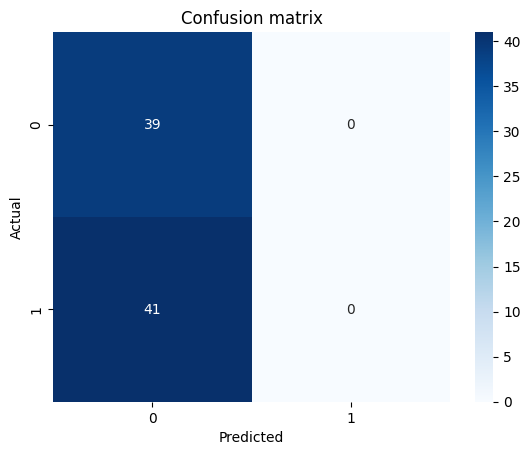

Średnia dokładność treningowa: 0.503, Hiperparametry: {'C': 0.001, 'degree': 6}
Dokładnośc dla zbioru treningowego: 0.503
Dokładność dla zbioru testowego: accuracy=0.487


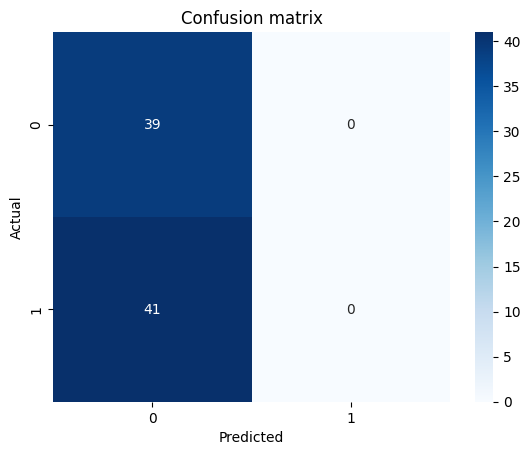

Średnia dokładność treningowa: 0.503, Hiperparametry: {'C': 0.001, 'degree': 8}
Dokładnośc dla zbioru treningowego: 0.534
Dokładność dla zbioru testowego: accuracy=0.487


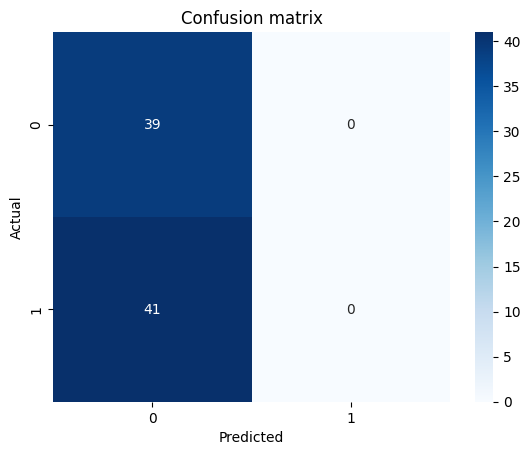

Średnia dokładność treningowa: 0.519, Hiperparametry: {'C': 0.001, 'degree': 9}
Dokładnośc dla zbioru treningowego: 0.541
Dokładność dla zbioru testowego: accuracy=0.575


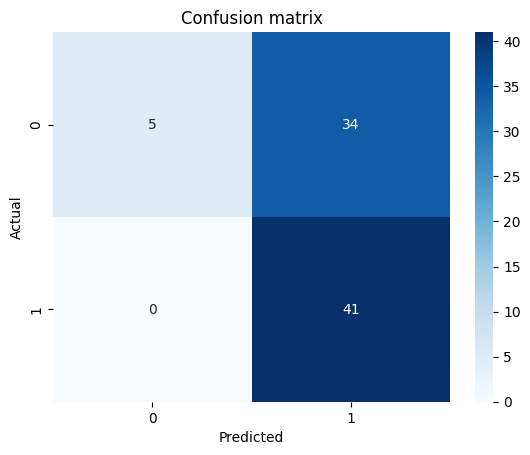

Średnia dokładność treningowa: 0.522, Hiperparametry: {'C': 0.001, 'degree': 10}
Dokładnośc dla zbioru treningowego: 0.547
Dokładność dla zbioru testowego: accuracy=0.588


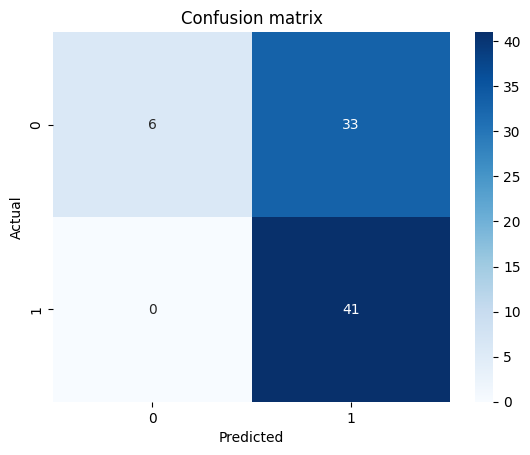

Średnia dokładność treningowa: 0.506, Hiperparametry: {'C': 0.01, 'degree': 2}
Dokładnośc dla zbioru treningowego: 0.503
Dokładność dla zbioru testowego: accuracy=0.487


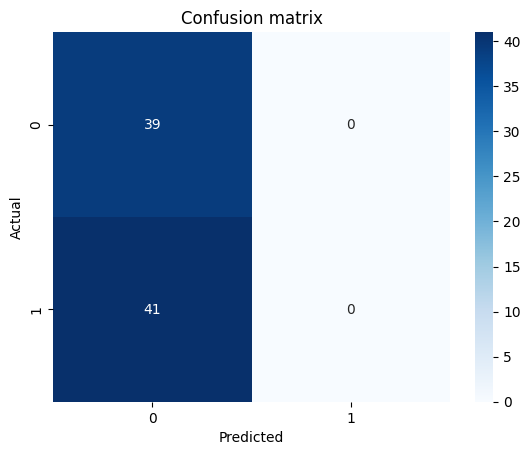

Średnia dokładność treningowa: 0.512, Hiperparametry: {'C': 0.01, 'degree': 4}
Dokładnośc dla zbioru treningowego: 0.637
Dokładność dla zbioru testowego: accuracy=0.675


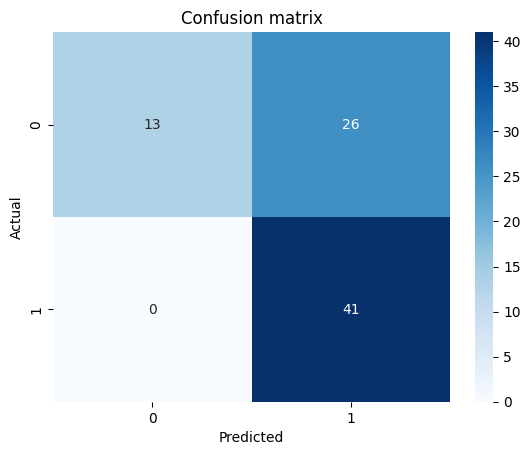

Średnia dokładność treningowa: 0.547, Hiperparametry: {'C': 0.01, 'degree': 6}
Dokładnośc dla zbioru treningowego: 0.556
Dokładność dla zbioru testowego: accuracy=0.613


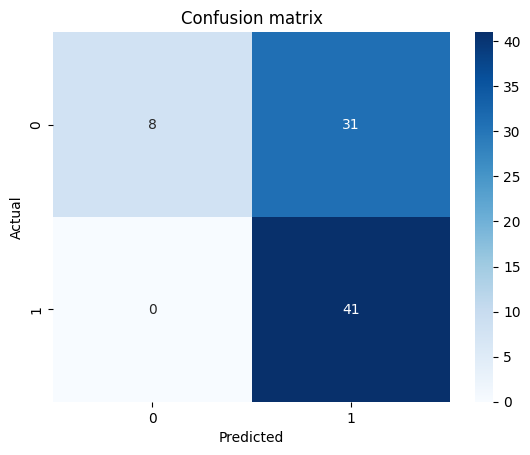

Średnia dokładność treningowa: 0.534, Hiperparametry: {'C': 0.01, 'degree': 8}
Dokładnośc dla zbioru treningowego: 0.578
Dokładność dla zbioru testowego: accuracy=0.613


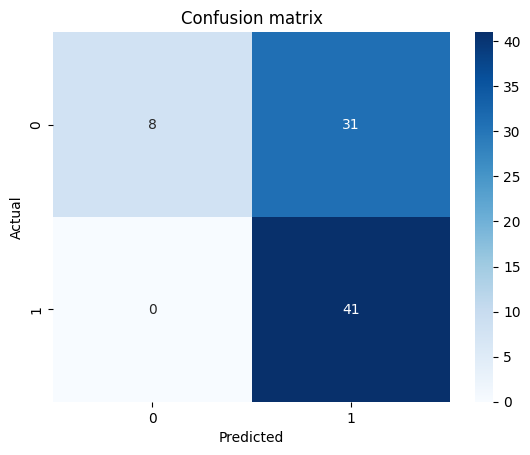

Średnia dokładność treningowa: 0.544, Hiperparametry: {'C': 0.01, 'degree': 9}
Dokładnośc dla zbioru treningowego: 0.625
Dokładność dla zbioru testowego: accuracy=0.637


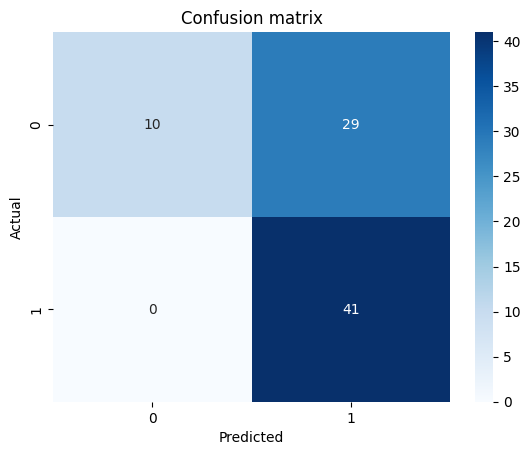

Średnia dokładność treningowa: 0.553, Hiperparametry: {'C': 0.01, 'degree': 10}
Dokładnośc dla zbioru treningowego: 0.631
Dokładność dla zbioru testowego: accuracy=0.637


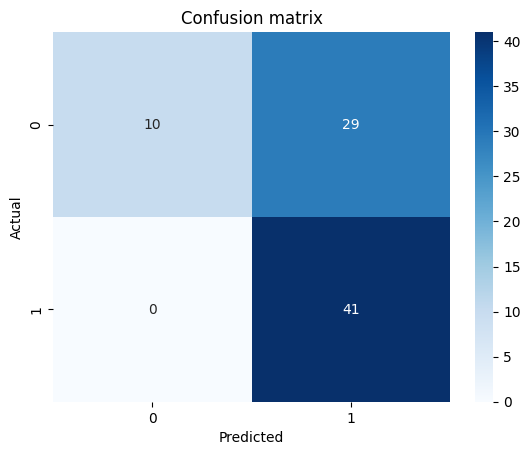

Średnia dokładność treningowa: 0.603, Hiperparametry: {'C': 0.1, 'degree': 2}
Dokładnośc dla zbioru treningowego: 0.641
Dokładność dla zbioru testowego: accuracy=0.675


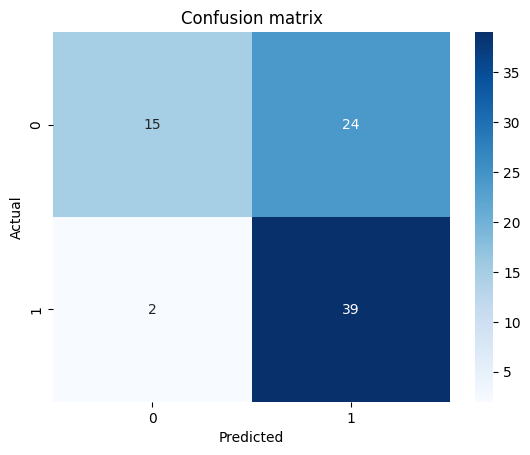

Średnia dokładność treningowa: 0.600, Hiperparametry: {'C': 0.1, 'degree': 4}
Dokładnośc dla zbioru treningowego: 0.672
Dokładność dla zbioru testowego: accuracy=0.713


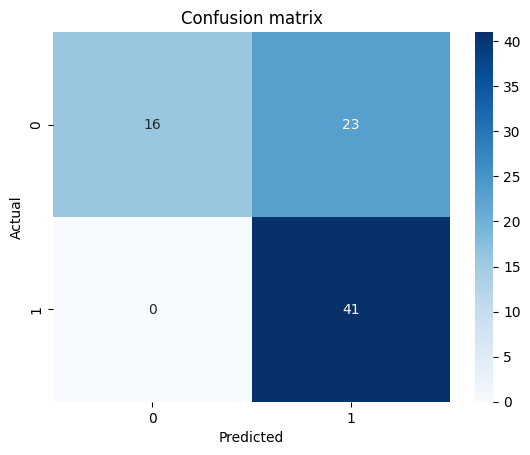

Średnia dokładność treningowa: 0.581, Hiperparametry: {'C': 0.1, 'degree': 6}
Dokładnośc dla zbioru treningowego: 0.784
Dokładność dla zbioru testowego: accuracy=0.688


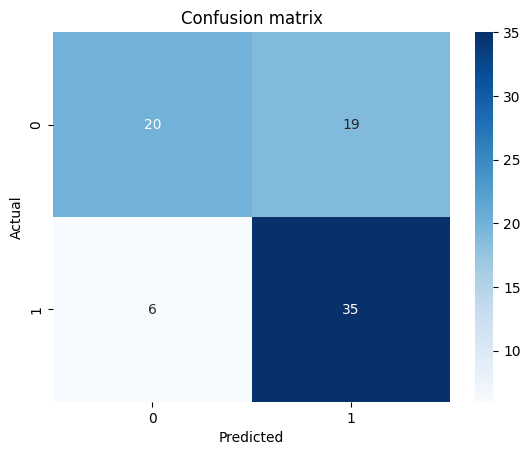

Średnia dokładność treningowa: 0.553, Hiperparametry: {'C': 0.1, 'degree': 8}
Dokładnośc dla zbioru treningowego: 0.775
Dokładność dla zbioru testowego: accuracy=0.675


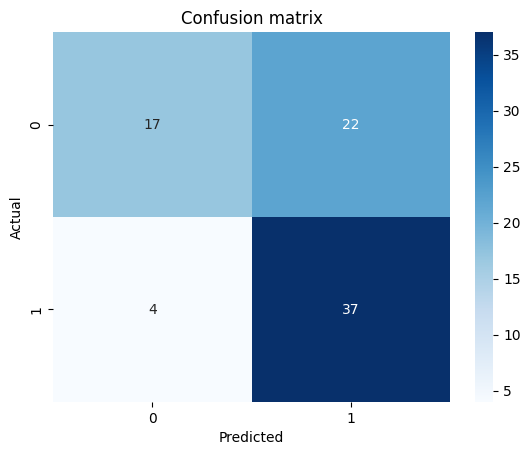

Średnia dokładność treningowa: 0.566, Hiperparametry: {'C': 0.1, 'degree': 9}
Dokładnośc dla zbioru treningowego: 0.744
Dokładność dla zbioru testowego: accuracy=0.688


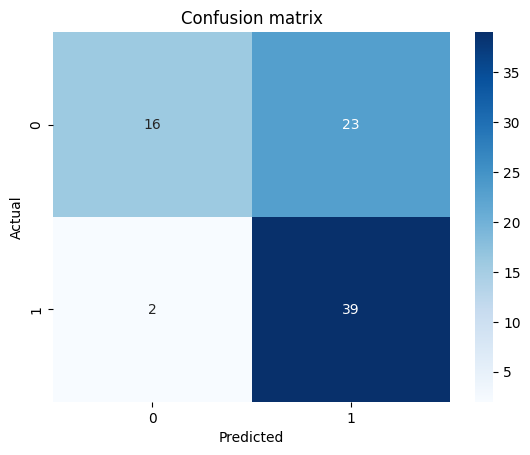

Średnia dokładność treningowa: 0.544, Hiperparametry: {'C': 0.1, 'degree': 10}
Dokładnośc dla zbioru treningowego: 0.753
Dokładność dla zbioru testowego: accuracy=0.688


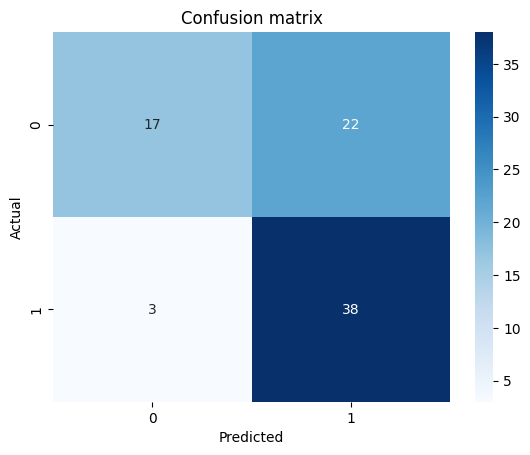

Średnia dokładność treningowa: 0.594, Hiperparametry: {'C': 1, 'degree': 2}
Dokładnośc dla zbioru treningowego: 0.713
Dokładność dla zbioru testowego: accuracy=0.675


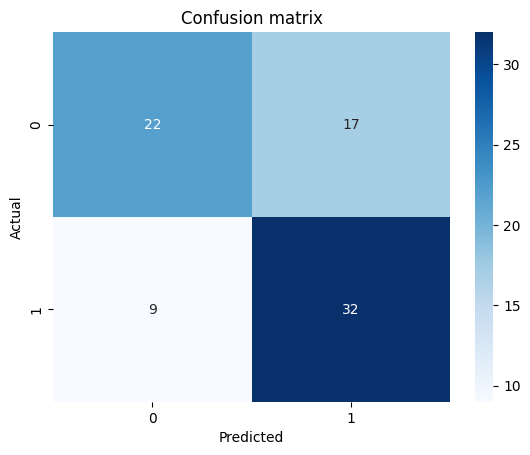

Średnia dokładność treningowa: 0.572, Hiperparametry: {'C': 1, 'degree': 4}
Dokładnośc dla zbioru treningowego: 0.816
Dokładność dla zbioru testowego: accuracy=0.700


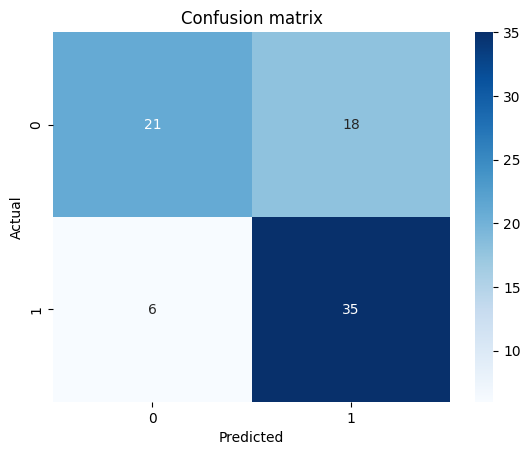

Średnia dokładność treningowa: 0.581, Hiperparametry: {'C': 1, 'degree': 6}
Dokładnośc dla zbioru treningowego: 0.797
Dokładność dla zbioru testowego: accuracy=0.662


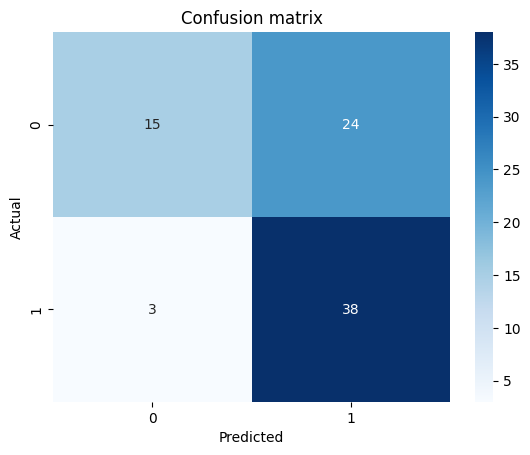

Średnia dokładność treningowa: 0.581, Hiperparametry: {'C': 1, 'degree': 8}
Dokładnośc dla zbioru treningowego: 0.769
Dokładność dla zbioru testowego: accuracy=0.688


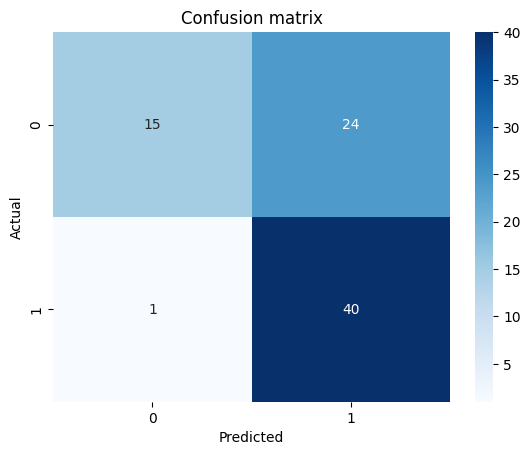

Średnia dokładność treningowa: 0.588, Hiperparametry: {'C': 1, 'degree': 9}
Dokładnośc dla zbioru treningowego: 0.762
Dokładność dla zbioru testowego: accuracy=0.675


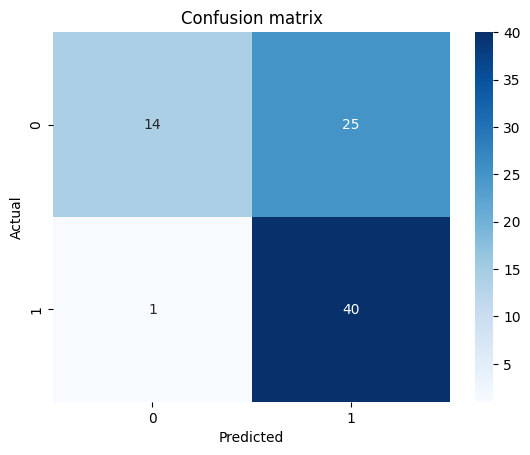

Średnia dokładność treningowa: 0.578, Hiperparametry: {'C': 1, 'degree': 10}
Dokładnośc dla zbioru treningowego: 0.750
Dokładność dla zbioru testowego: accuracy=0.675


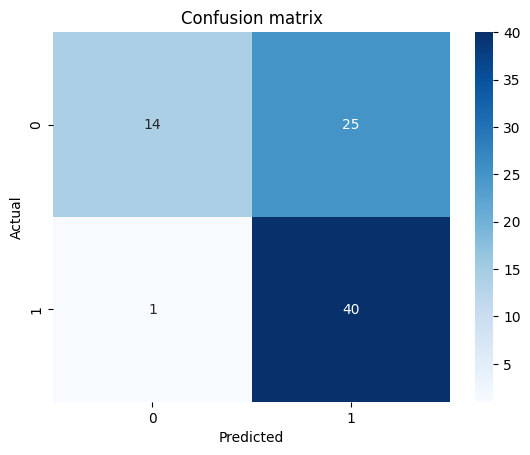

Średnia dokładność treningowa: 0.622, Hiperparametry: {'C': 10, 'degree': 2}
Dokładnośc dla zbioru treningowego: 0.791
Dokładność dla zbioru testowego: accuracy=0.713


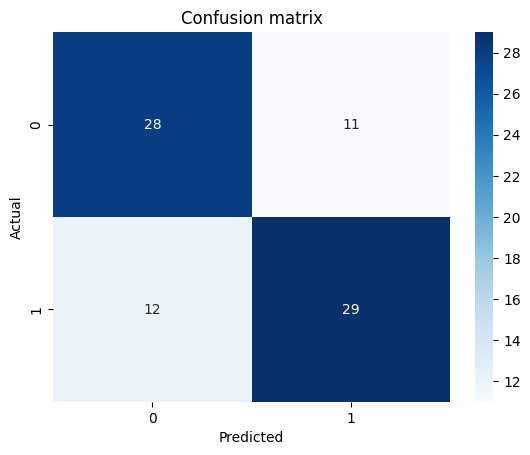

Średnia dokładność treningowa: 0.584, Hiperparametry: {'C': 10, 'degree': 4}
Dokładnośc dla zbioru treningowego: 0.944
Dokładność dla zbioru testowego: accuracy=0.662


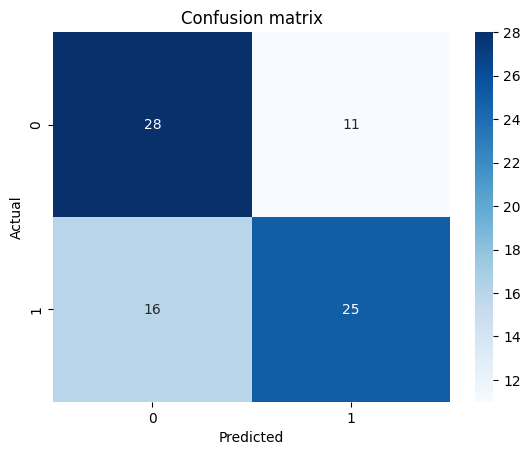

Średnia dokładność treningowa: 0.584, Hiperparametry: {'C': 10, 'degree': 6}
Dokładnośc dla zbioru treningowego: 0.944
Dokładność dla zbioru testowego: accuracy=0.613


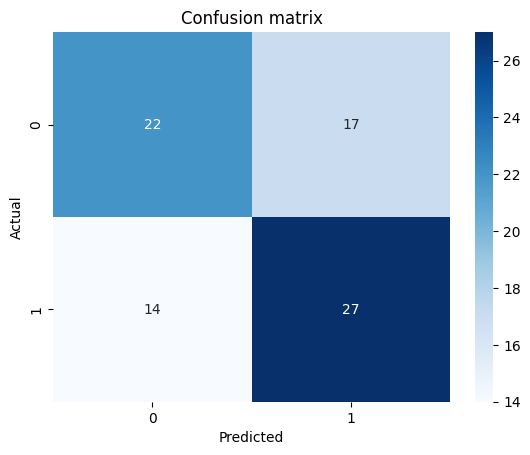

Średnia dokładność treningowa: 0.578, Hiperparametry: {'C': 10, 'degree': 8}
Dokładnośc dla zbioru treningowego: 0.919
Dokładność dla zbioru testowego: accuracy=0.650


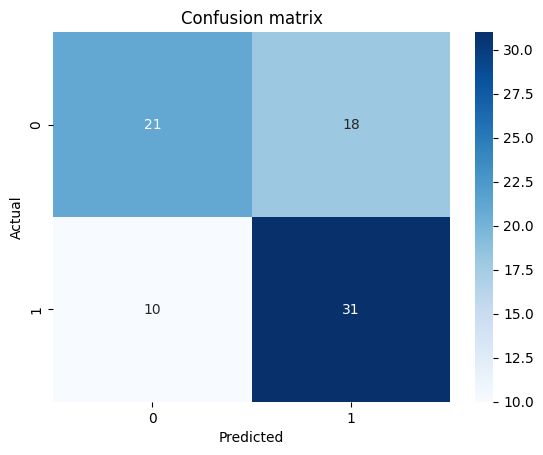

Średnia dokładność treningowa: 0.637, Hiperparametry: {'C': 10, 'degree': 9}
Dokładnośc dla zbioru treningowego: 0.912
Dokładność dla zbioru testowego: accuracy=0.625


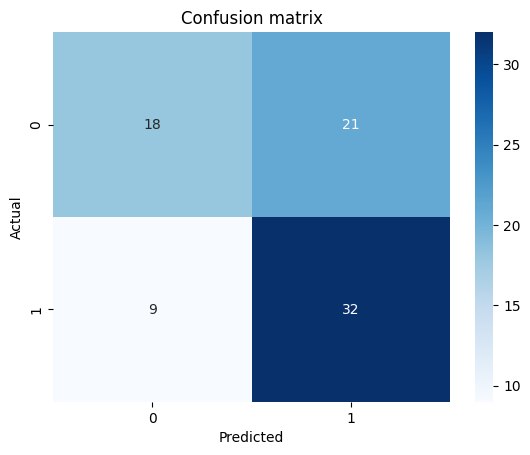

Średnia dokładność treningowa: 0.588, Hiperparametry: {'C': 10, 'degree': 10}
Dokładnośc dla zbioru treningowego: 0.891
Dokładność dla zbioru testowego: accuracy=0.662


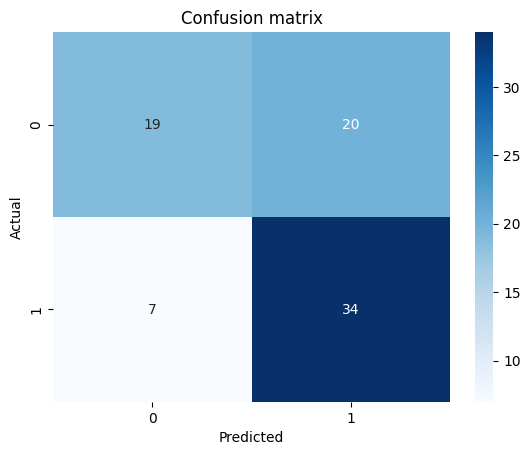

Średnia dokładność treningowa: 0.625, Hiperparametry: {'C': 100, 'degree': 2}
Dokładnośc dla zbioru treningowego: 0.787
Dokładność dla zbioru testowego: accuracy=0.713


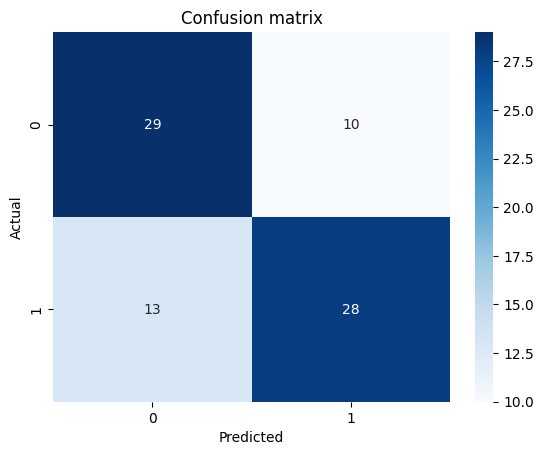

Średnia dokładność treningowa: 0.606, Hiperparametry: {'C': 100, 'degree': 4}
Dokładnośc dla zbioru treningowego: 0.991
Dokładność dla zbioru testowego: accuracy=0.650


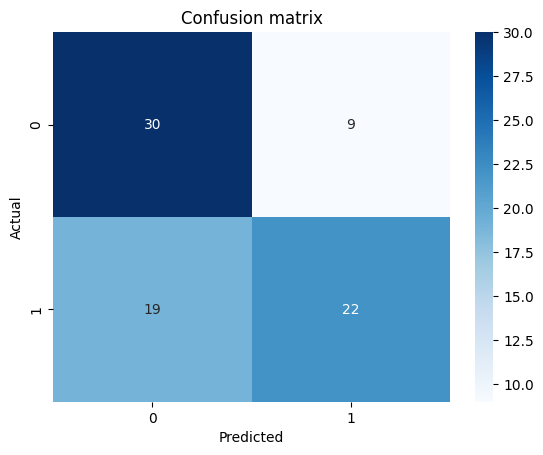

Średnia dokładność treningowa: 0.637, Hiperparametry: {'C': 100, 'degree': 6}
Dokładnośc dla zbioru treningowego: 0.975
Dokładność dla zbioru testowego: accuracy=0.588


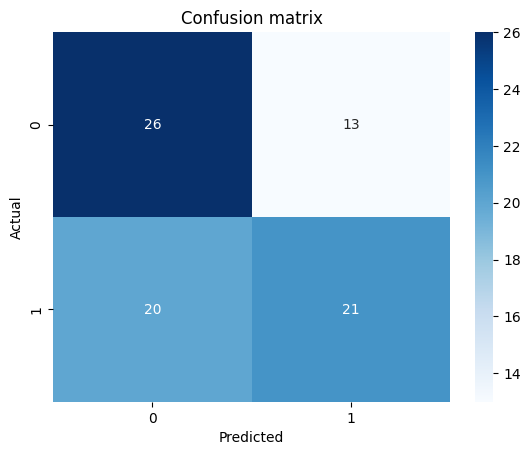

Średnia dokładność treningowa: 0.581, Hiperparametry: {'C': 100, 'degree': 8}
Dokładnośc dla zbioru treningowego: 0.972
Dokładność dla zbioru testowego: accuracy=0.562


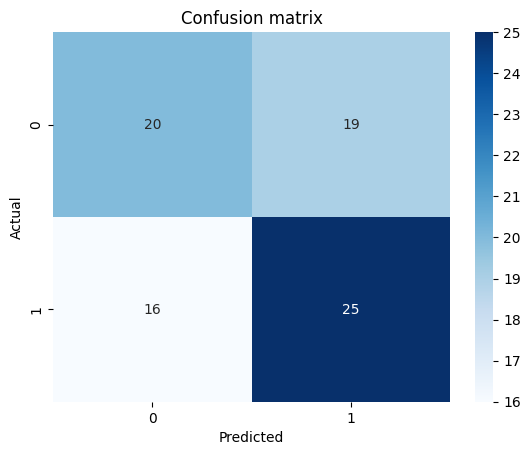

Średnia dokładność treningowa: 0.662, Hiperparametry: {'C': 100, 'degree': 9}
Dokładnośc dla zbioru treningowego: 0.934
Dokładność dla zbioru testowego: accuracy=0.650


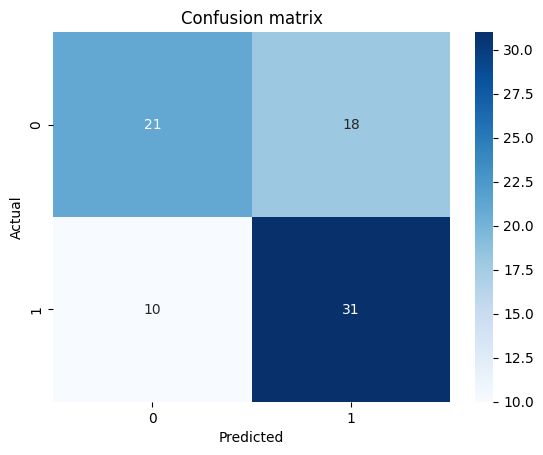

Średnia dokładność treningowa: 0.569, Hiperparametry: {'C': 100, 'degree': 10}
Dokładnośc dla zbioru treningowego: 0.916
Dokładność dla zbioru testowego: accuracy=0.613


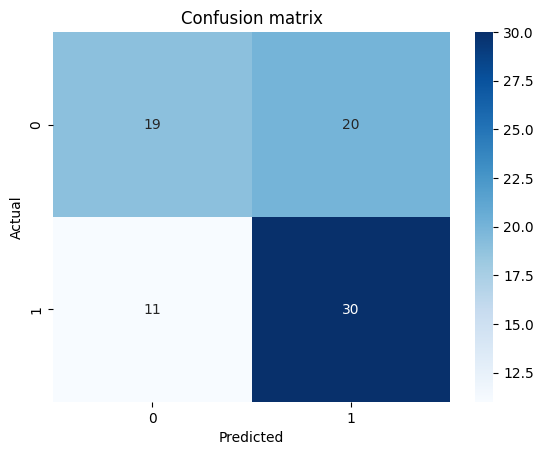

In [11]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree':[2, 4, 6, 8, 9, 10]}

svm_model = SVC(kernel='poly')

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

results = grid_search.cv_results_

for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Średnia dokładność treningowa: {mean_score:.3f}, Hiperparametry: {params}")

    best_model = SVC(kernel='poly', **params)
    best_model.fit(X_train, y_train)

    y_pred_train = best_model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    print(f"Dokładnośc dla zbioru treningowego: {accuracy_train:.3f}")

    y_pred_test = best_model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print(f"Dokładność dla zbioru testowego: accuracy={accuracy_test:.3f}")

    conf_matrix = confusion_matrix(y_test, y_pred_test)
    conf_matrix_with_labels = pd.DataFrame(conf_matrix, columns=[0, 1], index=[0, 1])
    sns.heatmap(conf_matrix_with_labels, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion matrix')
    plt.show()

    print("="*50)

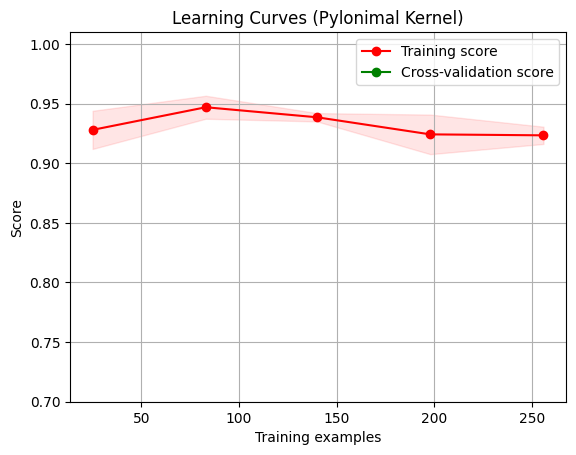

In [17]:
# Funkcja do generowania krzywych uczenia
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), degree=[2, 4, 6, 8, 9, 10], gamma='scale', coef=0):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Wywołanie funkcji do generowania krzywych uczenia
title = "Learning Curves (Pylonimal Kernel)"
plot_learning_curve(best_model, title, X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=4, degree=best_model.degree)
plt.show()
